# Origins and evolutions of names in France
## Introduction
### Dataset 
This project is once again part of the Open Data initiative. This time, we will analyze two datasets together:

1.​ A national data file containing the first names given to children born in France (excluding Mayotte) between 1900 and 2018 and the number of children of each gender associated with each first name. The data is classified by department. The file contains 3.5 million lines. The file is available at [this address](https://www.data.gouv.fr/fr/datasets/ficher-des-prenoms-de-1900-a-2018/).

2.​ [A second dataset](https://www.behindthename.com/ ) from Mike Campbell's work on his website “Behind the Name.”
> <span style='color:gray'> _Behind the Name is a website for learning about all aspects of given names. Its scope is broad: all given names from all cultures and periods are eligible to be included in the main name database. Names from mythology and fiction are also eligible. There are currently 22874 names in the database, a fraction of what the scope entails. There's still much work to be done._ </span>

The database from this site is also available at data.gouv.fr and includes several fields, including the origins of first names! The database from this site is available at [this address](https://www.data.gouv.fr/fr/datasets/liste-de-prenoms/)
/

Mike Campbell is a software designer and information architect based in Victoria, British Columbia, Canada:
- An [interview](https://nameberry.com/blog/behind-the-namer).
- If you would like to [speak with him (LinkedIn)](https://www.linkedin.com/in/mike-campbell-218b8124/).

### Context

The analysis of first names is nothing new in itself; in fact, it is a classic: analysis of instant popularity, history, “gender change” of first names, etc. Here are two examples of links that have reused this first dataset:
- “analysis” type of use (evolution over time, etc.):\
https://www.lefigaro.fr/fig-data/prenoms/
- "leaderboard" of popularity: Insee :\
https://www.insee.fr/fr/statistiques/3532172

## Retrieving data

In [1]:
import pandas as pd

# 'Behind the name data' file
df_btn = pd.read_csv("../data/Prenoms.csv", sep=";", header=0, encoding='ISO-8859-1')
df_btn = df_btn.rename(columns={"01_prenom": "prenom", "02_genre": "genre", "03_langage":"langage", "04_fréquence":"frequence"})
df_btn

,prenom,genre,langage,frequence
0,aaliyah,f,english (modern),0.0
1,aapeli,m,finnish,0.0
2,aapo,m,finnish,0.0
3,aaren,"m,f",english,0.0
4,aarne,m,finnish,0.0
...,...,...,...,...
11622,zvi,m,jewish,0.1
11623,zvonimir,m,croatian,0.0
11624,zvonimira,f,croatian,0.0
11625,zvonko,m,croatian,0.0


In [3]:
# French national data file
df_fr_raw = pd.read_csv("../data/dpt2018.csv", sep=";", header=0)

# Removing lines with unknown year
df_fr = df_fr_raw[df_fr_raw.annais!='XXXX']
df_fr

,sexe,preusuel,annais,dpt,nombre
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
6,1,AAHIL,2016,95,3
9,1,AARON,1962,75,3
10,1,AARON,1976,75,3
...,...,...,...,...,...
3624982,2,ÉVELYNE,1959,75,7
3624985,2,ÉVY,2017,42,3
3624986,2,ÉVY,2018,57,3
3624987,2,ÉVY,2018,69,4


## Proportion of men & women over time

In [4]:
# Using for loop and lists
def count_sex_at_given_year(sex, year):
    """
    Computes the number of babies of a given sex born on a given year.

    Args:
        sex (int): 1 for man and 2 for woman.
        year (int): a given year.
    
    Returns:
        (int): number of babies
    """

    df_temp = df_fr[df_fr.sexe==sex]
    return sum(df_temp[df_temp.annais==str(year)].nombre.values)

list_years = sorted(set(df_fr.annais.values))
list_men_count = list()
list_women_count = list()

for year in list_years:
    print(year,end="..\t")
    list_men_count.append(count_sex_at_given_year(sex=1, year=year))
    list_women_count.append(count_sex_at_given_year(sex=2, year=year))

1900..	1901..	1902..	1903..	1904..	1905..	1906..	1907..	1908..	1909..	1910..	1911..	1912..	1913..	1914..	1915..	1916..	1917..	1918..	1919..	1920..	1921..	1922..	1923..	1924..	1925..	1926..	1927..	1928..	1929..	1930..	1931..	1932..	1933..	1934..	1935..	1936..	1937..	1938..	1939..	1940..	1941..	1942..	1943..	1944..	1945..	1946..	1947..	1948..	1949..	1950..	1951..	1952..	1953..	1954..	1955..	1956..	1957..	1958..	1959..	1960..	1961..	1962..	1963..	1964..	1965..	1966..	1967..	1968..	1969..	1970..	1971..	1972..	1973..	1974..	1975..	1976..	1977..	1978..	1979..	1980..	1981..	1982..	1983..	1984..	1985..	1986..	1987..	1988..	1989..	1990..	1991..	1992..	1993..	1994..	1995..	1996..	1997..	1998..	1999..	2000..	2001..	2002..	2003..	2004..	2005..	2006..	2007..	2008..	2009..	2010..	2011..	2012..	2013..	2014..	2015..	2016..	2017..	2018..	

In [5]:
# Using Pandas where and sum methods
df_fr = df_fr_raw[df_fr_raw.annais!='XXXX']
list_years = sorted(set(df_fr.annais.values))
df_birhtovertime = pd.DataFrame()
df_birhtovertime["annee"] = list_years
df_birhtovertime["garcon"] = [df_fr["nombre"].where((df_fr.annais==year) & (df_fr.sexe==1)).sum() for year in list_years]
df_birhtovertime["fille"] = [df_fr["nombre"].where((df_fr.annais==year) & (df_fr.sexe==2)).sum() for year in list_years]


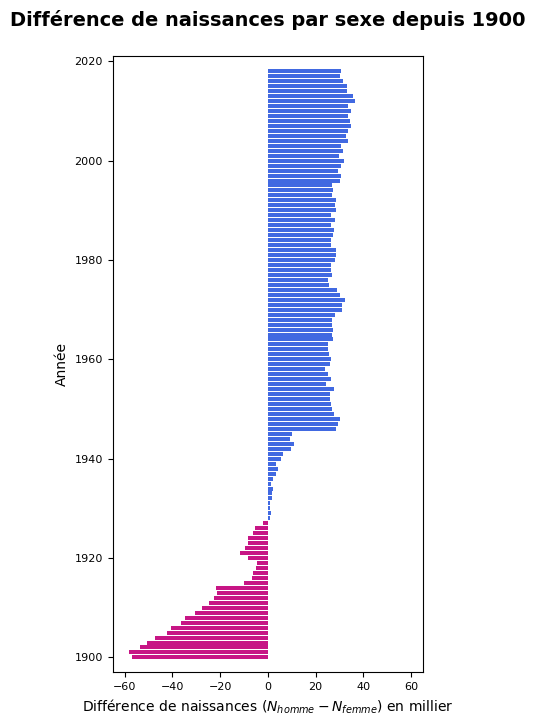

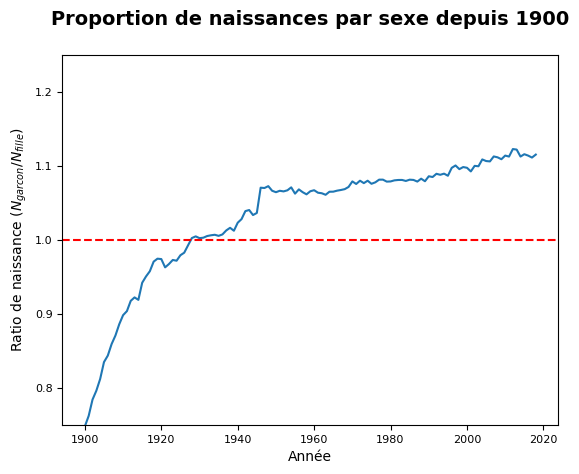

In [6]:
import numpy as np
import matplotlib.pyplot as plt

list_diff_sex_count = np.array([(list_men_count[i]-list_women_count[i])/1000 for i in range(len(list_women_count))])
mask_men = list_diff_sex_count > 0
mask_women = list_diff_sex_count <= 0
years = np.array([int(year) for year in list_years])

plt.figure(figsize=(4,8))
plt.barh(y=years[mask_men], 
         width=list_diff_sex_count[mask_men],
         color = "royalblue")
plt.barh(y=years[mask_women], 
         width=list_diff_sex_count[mask_women], color="mediumvioletred")
plt.xlabel("Différence de naissances ($N_{homme} - N_{femme}$) en millier", fontsize=10)
plt.ylabel("Année", fontsize=10)
plt.xlim((-65, 65))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim((1897, 2021))
plt.title("Différence de naissances par sexe depuis 1900\n", fontsize=14, fontweight="bold")
plt.show()

y = [list_men_count[i]/list_women_count[i] for i in range(len(list_men_count))]
plt.plot(years, y)
plt.axhline(1, color='red', linestyle='--')
plt.ylim((0.75, 1.25))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Proportion de naissances par sexe depuis 1900\n", fontsize=14, fontweight="bold")
plt.ylabel("Ratio de naissance ($N_{garcon}/N_{fille}$)", fontsize=10)
plt.xlabel("Année", fontsize=10)
plt.show()

## Reproducing plots from the Figaro article

### Evolution of the name "Marie" over time

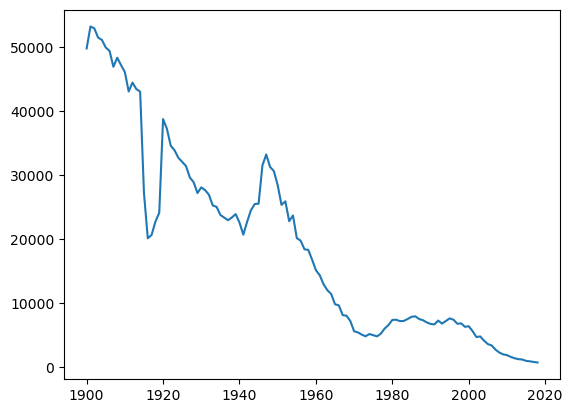

In [ ]:
df_marie = pd.DataFrame(df_fr[df_fr.preusuel=="MARIE"].groupby("annais", as_index=False).sum()[["annais", "nombre"]])
df_marie = df_marie.astype({'annais' : 'int'})

plt.plot(df_marie.annais, df_marie.nombre)
plt.ylim((0.75, 1.25))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.
plt.show()